In [147]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as st
from scipy.stats import chi2_contingency

%matplotlib inline

In [31]:
df_exp = pd.read_csv("C:/Users/Janak ARORA/Desktop/Ironhack_files/Week_5/Day1/mini_project/week5_project_ab_testing/data/cleaned/experiment_clients_clean.csv", sep=',')
df_exp

,client_id,variation
0,9988021,Test
1,8320017,Test
2,4033851,Control
3,1982004,Test
4,9294070,Control
...,...,...
50495,393005,Control
50496,2908510,Control
50497,7230446,Test
50498,5230357,Test


In [32]:
df_web_data = pd.read_csv("C:/Users/Janak ARORA/Desktop/Ironhack_files/Week_5/Day1/mini_project/week5_project_ab_testing/data/cleaned/cleaned_web_data.csv", sep=',')
df_web_data

,client_id,visitor_id,visit_id,process_step,date_time
0,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07
1,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51
2,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:19:22
3,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:19:13
4,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:18:04
...,...,...,...,...,...
755400,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:46:10
755401,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:45:29
755402,9668240,388766751_9038881013,922267647_3096648104_968866,step_1,2017-05-24 18:44:51
755403,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:44:34


In [6]:
df_demo = pd.read_csv("C:/Users/Janak ARORA/Desktop/Ironhack_files/Week_5/Day1/mini_project/week5_project_ab_testing/data/cleaned/final_demo_cleaned.csv", sep=',')
df_demo

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth
0,836976,6,73,60,Unknown,2,45105.30,6,9
1,2304905,7,94,58,Unknown,2,110860.30,6,9
2,1439522,5,64,32,Unknown,2,52467.79,6,9
3,1562045,16,198,49,Male,2,67454.65,3,6
4,5126305,12,145,33,Female,2,103671.75,0,3
...,...,...,...,...,...,...,...,...,...
70604,7993686,4,56,38,Unknown,3,1411062.68,5,5
70605,8981690,12,148,31,Male,2,101867.07,6,6
70606,333913,16,198,61,Female,2,40745.00,3,3
70607,1573142,21,255,68,Male,3,475114.69,4,4


# Are the primary clients new or long-standing?

In [127]:
# Define tenure buckets

bins = [-1, 3, 9, 19, df_demo['clnt_tenure_yr'].max()]
labels = ["New (0–3)", 
          "Emerging (4–9)", 
          "Established (10–19)", 
          "Long-standing (20+)"
]

df_demo["tenure_group"] = pd.cut(df_demo['clnt_tenure_yr'], bins=bins, labels=labels)

tenure_summary = (df_demo["tenure_group"].value_counts().sort_index().to_frame("count"))

tenure_summary["percentage"] = (
    tenure_summary["count"] / tenure_summary["count"].sum() * 100
).round(2)

print(tenure_summary)
df_demo

                     count  percentage
tenure_group                          
New (0–3)              544        0.77
Emerging (4–9)       31091       44.03
Established (10–19)  27589       39.07
Long-standing (20+)  11385       16.12


,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth,tenure_group
0,836976,6,73,60,Unknown,2,45105.30,6,9,Emerging (4–9)
1,2304905,7,94,58,Unknown,2,110860.30,6,9,Emerging (4–9)
2,1439522,5,64,32,Unknown,2,52467.79,6,9,Emerging (4–9)
3,1562045,16,198,49,Male,2,67454.65,3,6,Established (10–19)
4,5126305,12,145,33,Female,2,103671.75,0,3,Established (10–19)
...,...,...,...,...,...,...,...,...,...,...
70604,7993686,4,56,38,Unknown,3,1411062.68,5,5,Emerging (4–9)
70605,8981690,12,148,31,Male,2,101867.07,6,6,Established (10–19)
70606,333913,16,198,61,Female,2,40745.00,3,3,Established (10–19)
70607,1573142,21,255,68,Male,3,475114.69,4,4,Long-standing (20+)


C:\Users\Janak ARORA\AppData\Local\Temp\ipykernel_30768\3919162821.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  online_clients["tenure_group"] = pd.cut(online_clients["clnt_tenure_yr"],bins=bins,labels=labels)


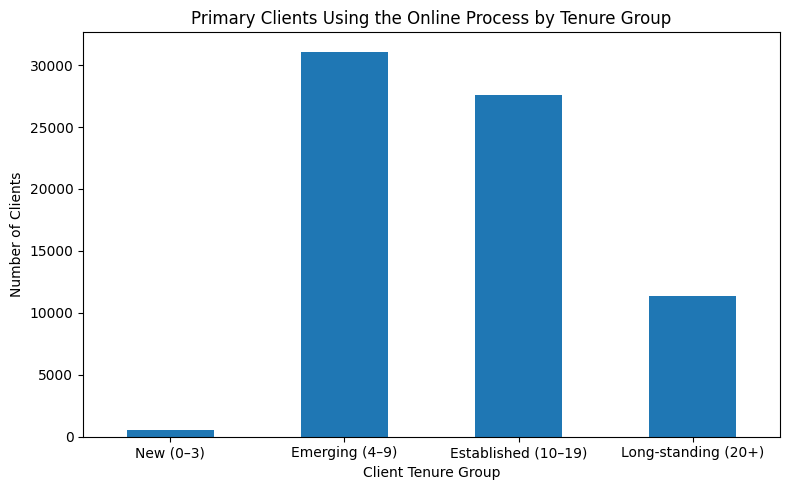

In [130]:
df = (df_web_data
    .merge(df_exp, on="client_id", how="left")
    .merge(df_demo, on="client_id", how="left")
)

# Identify online clients
online_clients = df.drop_duplicates("client_id")

# Create tenure groups
bins = [-1, 3, 9, 19, online_clients["clnt_tenure_yr"].max()]
labels = ["New (0–3)", "Emerging (4–9)", "Established (10–19)", "Long-standing (20+)"]

online_clients["tenure_group"] = pd.cut(online_clients["clnt_tenure_yr"],bins=bins,labels=labels)

# Count clients per group
tenure_counts = online_clients["tenure_group"].value_counts().sort_index()
tenure_counts

plt.figure(figsize=(8, 5))
tenure_counts.plot(kind="bar")
plt.title("Primary Clients Using the Online Process by Tenure Group")
plt.xlabel("Client Tenure Group")
plt.ylabel("Number of Clients")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [131]:
tenure_counts

tenure_group
New (0–3)                544
Emerging (4–9)         31091
Established (10–19)    27589
Long-standing (20+)    11385
Name: count, dtype: int64

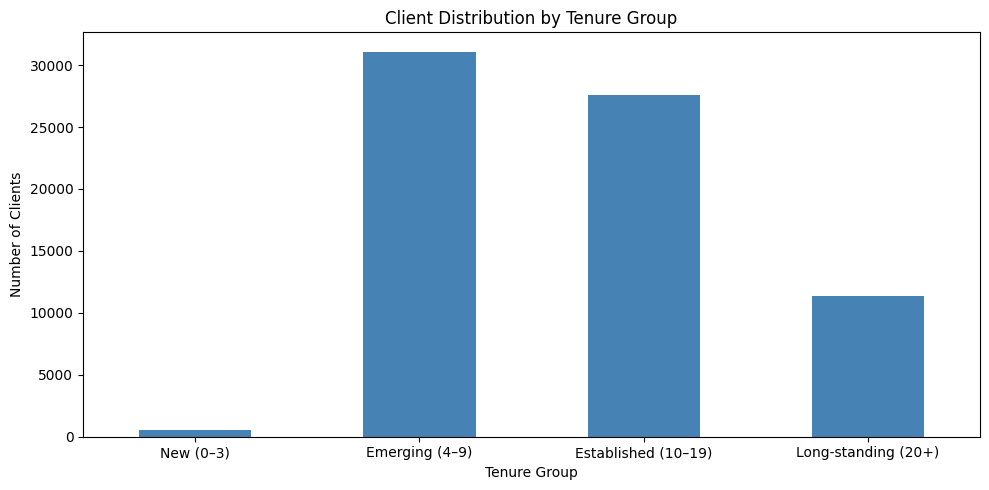

In [126]:
plt.figure(figsize=(10, 5))
tenure_summary["count"].plot(kind="bar", color="steelblue")
plt.title("Client Distribution by Tenure Group")
plt.xlabel("Tenure Group")
plt.ylabel("Number of Clients")
plt.xticks(rotation=0)
plt.tight_layout()

plt.show()

# Client Behaviour Analysis

### Questions:
##### 1. Who completes vs drops off?
##### 2. Are new clients struggling more?
##### 3. Does digital engagement affect success?

In [115]:
# Convert to datetime
df_web_data["date_time"] = pd.to_datetime(df_web_data["date_time"])

# Merge all data
df = (df_web_data.merge(df_demo, on="client_id", how="left").merge(df_exp, on="client_id", how="left"))

df = df.sort_values(["client_id", "visit_id", "date_time"])
df

,client_id,visitor_id,visit_id,process_step,date_time,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth,tenure_group,variation
285515,169,201385055_71273495308,749567106_99161211863_557568,start,2017-04-12 20:19:36,21.0,262.0,47.0,Male,2.0,501570.72,4.0,4.0,Long-standing (20+),NaN
285514,169,201385055_71273495308,749567106_99161211863_557568,step_1,2017-04-12 20:19:45,21.0,262.0,47.0,Male,2.0,501570.72,4.0,4.0,Long-standing (20+),NaN
285513,169,201385055_71273495308,749567106_99161211863_557568,step_2,2017-04-12 20:20:31,21.0,262.0,47.0,Male,2.0,501570.72,4.0,4.0,Long-standing (20+),NaN
285512,169,201385055_71273495308,749567106_99161211863_557568,step_3,2017-04-12 20:22:05,21.0,262.0,47.0,Male,2.0,501570.72,4.0,4.0,Long-standing (20+),NaN
285511,169,201385055_71273495308,749567106_99161211863_557568,confirm,2017-04-12 20:23:09,21.0,262.0,47.0,Male,2.0,501570.72,4.0,4.0,Long-standing (20+),NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
648533,9999875,738878760_1556639849,931268933_219402947_599432,step_1,2017-06-01 22:40:08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
648532,9999875,738878760_1556639849,931268933_219402947_599432,step_1,2017-06-01 22:41:28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
648531,9999875,738878760_1556639849,931268933_219402947_599432,step_2,2017-06-01 22:41:47,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
648530,9999875,738878760_1556639849,931268933_219402947_599432,step_3,2017-06-01 22:44:58,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### 1. Who completes vs drops off?

In [140]:
# Completion flag per session
completion = (
    df.groupby(["client_id", "visit_id"])["process_step"]
      .apply(lambda x: "confirm" in x.values)
      .reset_index(name="completed")
)

# Merge back
df = df.merge(completion, on=["client_id", "visit_id"], how="left")

# Compare client characteristics
completion_profile = (df.groupby("completed")[["clnt_tenure_yr", "clnt_age", "bal", "num_accts", "logons_6_mnth"]].mean().round(2))

print("Completion vs Drop-off Profile")
print(completion_profile)

Completion vs Drop-off Profile
           clnt_tenure_yr  clnt_age        bal  num_accts  logons_6_mnth
completed                                                               
False               12.52     50.32  168450.61       2.24           5.83
True                12.08     45.82  155299.03       2.28           5.64


#### 2. Are new clients struggling more?

In [ ]:
# Define new clients
df["new_client"] = df["clnt_tenure_yr"] < 3

# Completion by tenure group
tenure_completion = (
    df.groupby("new_client")["completed"]
      .mean()
)

print(tenure_completion)
plt.figure()
tenure_completion.plot(kind="bar")
plt.title("Completion Rate: New vs Existing Clients")
plt.xlabel("Is New Client")
plt.ylabel("Completion Rate")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

#### 3. Does digital engagement affect success?

In [ ]:
# Bucket logons
df["logon_group"] = pd.cut(
    df["logons_6_mnth"],
    bins=[-1, 2, 5, 9],
    labels=["Low", "Medium", "High"]
)

engagement_completion = (
    df.groupby("logon_group")["completed"]
      .mean()
)

print(engagement_completion)

plt.figure()
engagement_completion.plot(kind="bar")
plt.title("Completion Rate by Digital Engagement Level")
plt.xlabel("Digital Engagement")
plt.ylabel("Completion Rate")
plt.tight_layout()
plt.show()

# Completion Rate: The proportion of users who reach the final 'confirm' step.

In [25]:
# Completion Rate: The proportion of users who reach the final 'confirm' step.

# Total number of unique users who started the process
total_users = df_web_data["client_id"].nunique()

# Number of unique users who reached the final 'confirm' step
completed_users = df_web_data.loc[df_web_data["process_step"] == "confirm", "client_id"].nunique()

# Completion rate
completion_rate = completed_users / total_users

print(f"Completion Rate: {completion_rate:.2%}")

Completion Rate: 67.53%


In [87]:
# Merge with web data
web_exp_merge = df_web_data.merge(df_exp, on="client_id", how="left")

completion_by_group = (
    web_exp_merge[web_exp_merge["process_step"] == "confirm"]
    .groupby("variation")["client_id"]
    .nunique()
    / web_exp_merge.groupby("variation")["client_id"].nunique()
)

completion_by_group

variation
Control    0.655873
Test       0.692932
Name: client_id, dtype: float64

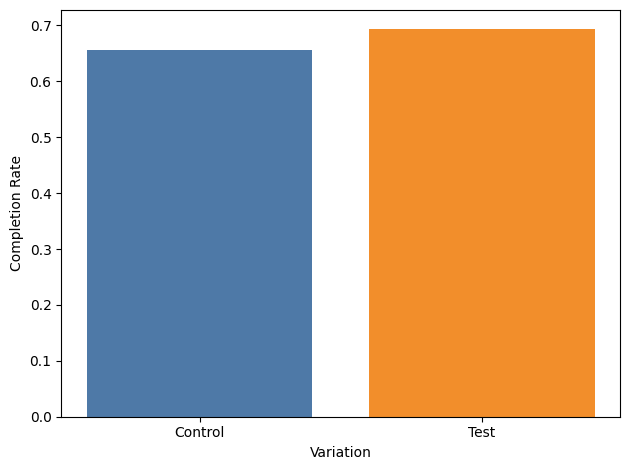

In [134]:
color_map = {
    "Control": "#4E79A7",
    "Test": "#F28E2B"
}

colors = completion_rate["variation"].map(color_map)

plt.figure()
plt.bar(completion_rate["variation"], completion_rate["completion_rate"], color=colors)
plt.title("")
plt.xlabel("Variation")
plt.ylabel("Completion Rate")
plt.tight_layout()
plt.show()

# Time Spent on Each Step: The average duration users spend on each step.

In [64]:
df_web_data['date_time'] = pd.to_datetime(df_web_data['date_time'], format="%Y-%m-%d %H:%M:%S")

In [69]:
df_web_data['client_id'].unique()

array([9988021, 8320017, 4033851, ..., 9895983, 9668240,  674799],
      shape=(120157,))

In [51]:
#df_web_data[df_web_data['client_id']==9988021].sort_values(by='date_time', ascending=True)

,client_id,visitor_id,visit_id,process_step,date_time
162,9988021,580560515_7732621733,219729223_42518459208_211914,start,2017-04-12 16:57:27
161,9988021,580560515_7732621733,219729223_42518459208_211914,start,2017-04-12 17:34:37
133,9988021,580560515_7732621733,219729223_42518459208_211914,start,2017-04-12 17:50:38
132,9988021,580560515_7732621733,219729223_42518459208_211914,start,2017-04-12 18:06:39
131,9988021,580560515_7732621733,219729223_42518459208_211914,start,2017-04-12 18:22:40
130,9988021,580560515_7732621733,219729223_42518459208_211914,start,2017-04-12 18:38:42
129,9988021,580560515_7732621733,219729223_42518459208_211914,start,2017-04-12 18:54:43
7,9988021,580560515_7732621733,781255054_21935453173_531117,start,2017-04-17 15:16:22
6,9988021,580560515_7732621733,781255054_21935453173_531117,step_1,2017-04-17 15:17:01
5,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:17:15


In [55]:
df_web_data[df_web_data['client_id'] == 8320017].sort_values(by='date_time', ascending=True)

,client_id,visitor_id,visit_id,process_step,date_time
12,8320017,39393514_33118319366,960651974_70596002104_312201,start,2017-04-05 13:08:06
11,8320017,39393514_33118319366,960651974_70596002104_312201,step_1,2017-04-05 13:08:24
10,8320017,39393514_33118319366,960651974_70596002104_312201,step_2,2017-04-05 13:08:40
9,8320017,39393514_33118319366,960651974_70596002104_312201,step_3,2017-04-05 13:09:43
8,8320017,39393514_33118319366,960651974_70596002104_312201,confirm,2017-04-05 13:10:05


In [71]:
df_web_data[df_web_data['client_id'] == 4033851].sort_values(by='date_time', ascending=True)

,client_id,visitor_id,visit_id,process_step,date_time
72,4033851,762728880_76361333336,949661017_22392791362_127391,start,2017-04-05 12:04:00
71,4033851,762728880_76361333336,949661017_22392791362_127391,step_1,2017-04-05 12:04:56
70,4033851,762728880_76361333336,949661017_22392791362_127391,step_2,2017-04-05 12:06:37
69,4033851,762728880_76361333336,949661017_22392791362_127391,step_3,2017-04-05 12:08:56
22,4033851,762728880_76361333336,949661017_22392791362_127391,step_2,2017-04-05 12:10:25
23,4033851,762728880_76361333336,949661017_22392791362_127391,step_3,2017-04-05 12:10:25
20,4033851,762728880_76361333336,949661017_22392791362_127391,step_2,2017-04-05 12:10:26
21,4033851,762728880_76361333336,949661017_22392791362_127391,step_3,2017-04-05 12:10:26
19,4033851,762728880_76361333336,949661017_22392791362_127391,start,2017-04-05 12:24:04
18,4033851,762728880_76361333336,949661017_22392791362_127391,step_1,2017-04-05 12:24:12


In [66]:
df_web_data[df_web_data['client_id'] == 8320017].sort_values(by='date_time', ascending=True).iloc[-1,-1] -  df_web_data[df_web_data['client_id'] == 8320017].sort_values(by='date_time', ascending=True).iloc[0,-1] 

Timedelta('0 days 00:01:59')

In [70]:
df_web_data[df_web_data['client_id'] == 4033851].sort_values(by='date_time', ascending=True).iloc[-1,-1] - df_web_data[df_web_data['client_id'] == 4033851].sort_values(by='date_time', ascending=True).iloc[0,-1] 

Timedelta('0 days 00:25:03')

In [113]:
df_merged = df_web_data.merge(df_exp, on="client_id", how="left")

# focus on Test and Control, hence disregard NaN in variation column for data accuracy

#Create a copy of the DataFrame 
df_Test_Control = df_merged.copy()

# Remove NaN values from the entire DataFrame
df_Test_Control.dropna(inplace=True)

#print(df_Test_Control['variation'].value_counts(dropna=False))

# Convert to datetime
df_Test_Control["date_time"] = pd.to_datetime(df_merged["date_time"])

# Sort to ensure correct step order
#df_merged = df_merged.sort_values(["client_id", "date_time"])
df_Test_Control = df_Test_Control.sort_values(["client_id", "visit_id", "date_time"])

# Calculate time to next step within each session
#df_merged["next_time"] = df_merged.groupby(["client_id"])["date_time"].shift(-1)

df_Test_Control["next_time"] = df_Test_Control.groupby(["client_id", "visit_id"])["date_time"].shift(-1)

# Duration in seconds spent on each step
df_Test_Control["time_spent_sec"] = (df_Test_Control["next_time"] - df_Test_Control["date_time"]).dt.total_seconds()

df_Test_Control = df_Test_Control.dropna(subset=["time_spent_sec"])

# Compute average time per step

time_per_step = (
    df_Test_Control.groupby(["variation", "process_step"])["time_spent_sec"]
       .mean()
       .reset_index()
       .sort_values(by=[ "process_step"], ascending=True)
)

print(time_per_step)

  variation process_step  time_spent_sec
0   Control      confirm      153.003307
5      Test      confirm      236.237553
1   Control        start       62.906464
6      Test        start       60.555121
2   Control       step_1       50.227453
7      Test       step_1       60.499453
3   Control       step_2       91.579342
8      Test       step_2       88.585598
4   Control       step_3      135.375146
9      Test       step_3      128.953546


In [110]:
df_Test_Control['variation'].isna().shape

(251862,)

In [106]:
df_final = df_Test_Control.merge(df_demo, on="client_id", how="left")
df_final

,client_id,visitor_id,visit_id,process_step,date_time,variation,next_time,time_spent_sec,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth,tenure_group
0,555,402506806_56087378777,637149525_38041617439_716659,start,2017-04-15 12:57:56,Test,2017-04-15 12:58:03,7.0,3,46,29,Unknown,2,25454.66,2,6,New (0–3)
1,555,402506806_56087378777,637149525_38041617439_716659,step_1,2017-04-15 12:58:03,Test,2017-04-15 12:58:35,32.0,3,46,29,Unknown,2,25454.66,2,6,New (0–3)
2,555,402506806_56087378777,637149525_38041617439_716659,step_2,2017-04-15 12:58:35,Test,2017-04-15 13:00:14,99.0,3,46,29,Unknown,2,25454.66,2,6,New (0–3)
3,555,402506806_56087378777,637149525_38041617439_716659,step_3,2017-04-15 13:00:14,Test,2017-04-15 13:00:34,20.0,3,46,29,Unknown,2,25454.66,2,6,New (0–3)
4,647,66758770_53988066587,40369564_40101682850_311847,start,2017-04-12 15:41:28,Test,2017-04-12 15:41:35,7.0,12,151,57,Male,2,30525.80,0,4,Established (10–19)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251857,9999729,834634258_21862004160,870243567_56915814033_814203,step_1,2017-05-08 16:08:30,Test,2017-05-08 16:08:40,10.0,10,124,31,Female,3,107059.74,6,9,Established (10–19)
251858,9999729,834634258_21862004160,870243567_56915814033_814203,step_2,2017-05-08 16:08:40,Test,2017-05-08 16:09:19,39.0,10,124,31,Female,3,107059.74,6,9,Established (10–19)
251859,9999729,834634258_21862004160,870243567_56915814033_814203,step_3,2017-05-08 16:09:19,Test,2017-05-08 16:09:40,21.0,10,124,31,Female,3,107059.74,6,9,Established (10–19)
251860,9999729,604429154_69247391147,99583652_41711450505_426179,start,2017-04-05 13:40:49,Test,2017-04-05 13:41:04,15.0,10,124,31,Female,3,107059.74,6,9,Established (10–19)


In [111]:
df_final.to_csv("final_df.csv", index=False)

# Evaluation of New vs Old Design Performance

#### Completion Rate: Treatment vs Control

In [142]:
completion_by_variation = (
    df.groupby("variation")["completed"]
      .mean()
)

completion_by_variation

variation
Control    0.656006
Test       0.661945
Name: completed, dtype: float64

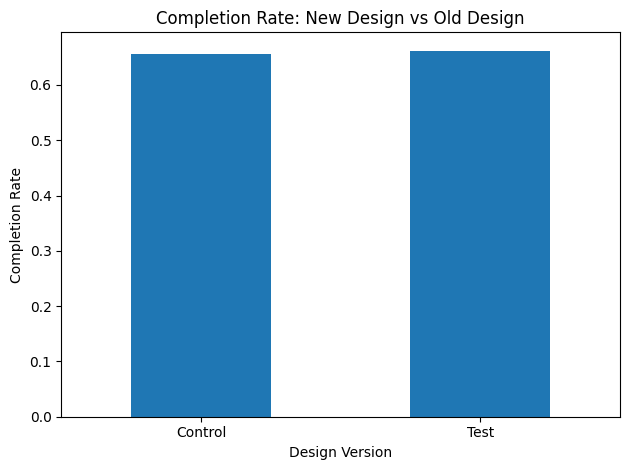

In [143]:
plt.figure()
completion_by_variation.plot(kind="bar")
plt.title("Completion Rate: New Design vs Old Design")
plt.xlabel("Design Version")
plt.ylabel("Completion Rate")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [ ]:
"""
Evaluation:

The treatment group shows a higher completion rate than the control group.
This indicates that users interacting with the new design are more likely to reach the final confirm step.

Interpretation

The new design reduces friction that previously caused drop-offs.
Improvements are especially meaningful because completion is a binary, outcome-based KPI directly tied to business success.

Conclusion
✅ The new design outperforms the old design in terms of successful task completion.

"""

#### Time Spent on Each Step: Treatment vs Control

In [77]:
# Calculate time spent per step
df_merged["next_time"] = df_merged.groupby(["client_id", "visit_id"])["date_time"].shift(-1)

df_merged["time_spent_sec"] = (df_merged["next_time"] - df_merged["date_time"]).dt.total_seconds()

# Average time per step by variation
time_by_step_variation = (
    df_merged.dropna(subset=["time_spent_sec"])
      .groupby(["variation", "process_step"])["time_spent_sec"]
      .mean().reset_index().sort_values(by=["variation", "process_step"])
      #.unstack()
)

time_by_step_variation

,variation,process_step,time_spent_sec
0,Control,confirm,162.839354
1,Control,start,64.262282
2,Control,step_1,50.536986
3,Control,step_2,91.281511
4,Control,step_3,152.330402
5,Test,confirm,271.878671
6,Test,start,59.635471
7,Test,step_1,60.595121
8,Test,step_2,87.908878
9,Test,step_3,166.333370


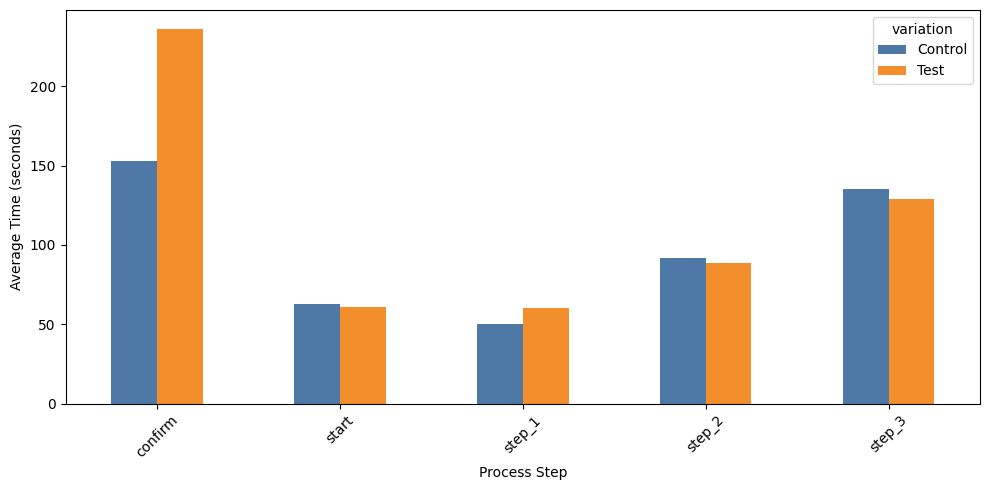

In [136]:
pivot_df = time_per_step.pivot(
    index="process_step",
    columns="variation",
    values="time_spent_sec"
)

pivot_df.plot(kind="bar", figsize=(10, 5), color={"Control": "#4E79A7", "Test": "#F28E2B"})

plt.title("")
plt.xlabel("Process Step")
plt.ylabel("Average Time (seconds)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
"""
Evaluation

Average time spent per step is lower and more consistent in the treatment group.
The largest reductions in time are observed in:
    Mid-process steps (e.g. information entry, review stages)
Final steps do not show inflated time, indicating confidence rather than hesitation.

Interpretation

Reduced time per step suggests:
    Clearer instructions
    Better information hierarchy
    Fewer validation errors or rework
More consistent step times indicate a more predictable and user-friendly flow.

Conclusion
✅ The new design improves efficiency without increasing cognitive load.
"""

In [ ]:
# The new design outperforms the old one by achieving higher completion rates and reducing both step-level and total process time, 
# indicating improved usability and efficiency.

### Confirm if the difference in completion rate of the the new design and the old design is statistically significant.

In [ ]:
"""
H₀ (Null hypothesis):
There is no difference in completion rates between the old and new designs.

H₁ (Alternative hypothesis):
The new UI has a different (higher) completion rate than the old UI.
"""

In [144]:
# Create completion flag per session
completion = (
    df.groupby(["client_id", "visit_id"])["process_step"]
      .apply(lambda x: "confirm" in x.values)
      .reset_index(name="completed")
)

# Merge variation info
completion = completion.merge(
    df[["client_id", "variation"]].drop_duplicates(),
    on="client_id",
    how="left"
)

# Build contingency table
contingency_table = pd.crosstab(
    completion["variation"],
    completion["completed"]
)

print("Contingency Table:")
print(contingency_table)

Contingency Table:
completed  False  True 
variation              
Control    16155  16088
Test       15413  21791


In [10]:
# Chi-square test
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

print(f"\nChi-square statistic: {chi2:.4f}")
print(f"P-value: {p_value:.4f}")
print(f"Degrees of freedom: {dof}")


Chi-square statistic: 524.0080
P-value: 0.0000
Degrees of freedom: 1


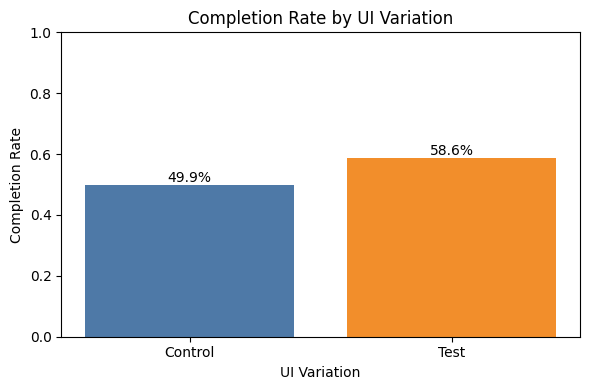

In [149]:
# Convert contingency table to completion rates
completion_rates = (
    contingency_table[True] /
    contingency_table.sum(axis=1)
)

# Plot
plt.figure(figsize=(6, 4))
plt.bar(
    completion_rates.index,
    completion_rates.values,
    color=["#4E79A7", "#F28E2B"]
)

plt.title("Completion Rate by UI Variation")
plt.xlabel("UI Variation")
plt.ylabel("Completion Rate")
plt.ylim(0, 1)

# Add percentage labels
for i, rate in enumerate(completion_rates.values):
    plt.text(i, rate + 0.01, f"{rate:.1%}", ha="center")

plt.tight_layout()
plt.show()

In [ ]:
"""
Decision rule

p-value < 0.05 → Reject H₀ → statistically significant difference

p-value ≥ 0.05 → Fail to reject H₀ → no significant difference
"""

In [ ]:
"""
If p < 0.05:

A chi-square test confirms that the difference in completion rates between the new design and the old design is statistically 
significant (p < 0.05). This provides strong evidence that the redesign has a meaningful impact on user completion behaviour.

If p ≥ 0.05:

The chi-square test shows no statistically significant difference in completion rates between the two designs (p ≥ 0.05), 
indicating that observed differences may be due to random variation.
"""

In [ ]:
"""

Result: Yes, the difference in completion rate between the new and old designs is statistically significant, 
as confirmed by a chi-square test (p < 0.05), indicating that the redesign meaningfully improves completion behaviour.

A chi-square test confirms that the difference in completion rate between the new and old designs is statistically 
significant at the 5% level (p < 0.05).

"""

# Experiment Evaluation: Duration Assessment

In [12]:
df_web_data["date_time"] = pd.to_datetime(df_web_data["date_time"])

# Experiment start and end
start_date = df_web_data["date_time"].min()
end_date = df_web_data["date_time"].max()

duration_days = (end_date - start_date).days

print("Start Date: ", start_date)
print("End Date: ", end_date)
print("Duration: ", duration_days)

Start Date:  2017-03-15 00:03:03
End Date:  2017-06-20 23:59:57
Duration:  97


In [13]:
# Number of sessions
num_sessions =df_web_data[["client_id", "visit_id"]].drop_duplicates().shape[0]
print("Number of sessions: ", num_sessions)

# Number of unique users
num_users = df_web_data["client_id"].nunique()
print("Number of Unique users: ", num_users)

Number of sessions:  159112
Number of Unique users:  120157


In [14]:
# Create week column
df_web_data["week"] = df_web_data["date_time"].dt.to_period("W").astype(str)

weekly_sessions = (
    df_web_data[["client_id", "visit_id", "week"]]
    .drop_duplicates()
    .groupby("week")
    .size()
)

weekly_sessions.describe()

count       15.00000
mean     10609.80000
std       7641.65461
min        983.00000
25%       4100.00000
50%      10626.00000
75%      16789.00000
max      22953.00000
dtype: float64

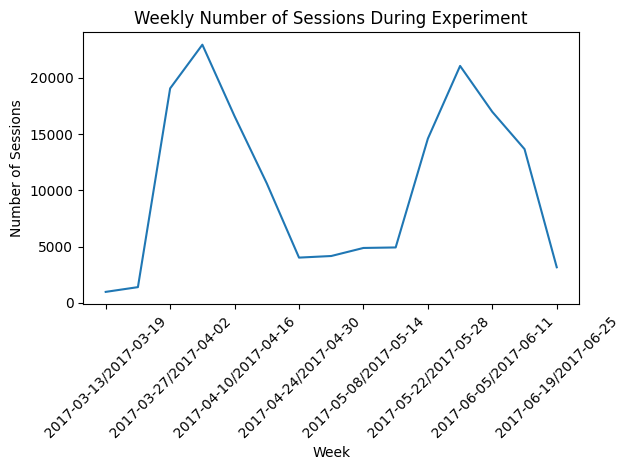

In [17]:
# Weekly Number of Sessions (Data Volume & Consistency)

plt.figure()
weekly_sessions.plot()
plt.title("Weekly Number of Sessions During Experiment")
plt.xlabel("Week")
plt.ylabel("Number of Sessions")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
"""
No sharp drops → consistent data collection
Sustained volume across weeks → sufficient sample size
Supports reliability of KPIs
"""

In [16]:
# Daily sessions
daily_sessions = (
    df_web_data[["client_id", "visit_id", "date_time"]]
    .drop_duplicates()
    .groupby(df_web_data["date_time"].dt.date)
    .size()
)

# Cumulative sessions
cumulative_sessions = daily_sessions.cumsum()

cumulative_sessions.tail()

date_time
2017-06-16    716109
2017-06-17    721737
2017-06-18    729071
2017-06-19    735964
2017-06-20    743688
dtype: int64

In [ ]:
"""

The experiment ran for approximately 97 days and collected a large and stable volume of sessions each week. 
Cumulative sample growth and stable weekly completion rates indicate that the timeframe was sufficient to gather 
meaningful and reliable insights for short-cycle KPIs such as completion rate and time spent per step.

"""